## Beautiful and insightful charts with Python — the Quick, the Pretty, and the Awesome.

In today’s article, we are going to look into three different ways of plotting data with Python. We will do this by utilizing data from the World Happiness Report 2019. I enriched the World Happiness Report data with information from Gapminder and Wikipedia to allow for the exploration of new relationships and visualizations.


### the Quick: Plotting with pandas plot

In [1]:
import pandas as pd
import numpy as np

In [10]:
# Importing the csv file
data = pd.read_csv('/Users/abreualberto91/Desktop/PYTHON/datasets/happy.csv')

In [28]:
data = pd.read_csv('https://raw.githubusercontent.com/FBosler/AdvancedPlotting/master/combined_set.csv')

In [29]:
data.head()

,Year,Country name,ISO3,Continent,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Gapminder Life Expectancy,Gapminder Population
0,2007,Afghanistan,AFG,Asia,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,55.2,27300000.0
1,2008,Afghanistan,AFG,Asia,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,55.2,27300000.0
2,2009,Afghanistan,AFG,Asia,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,55.7,28000000.0
3,2010,Afghanistan,AFG,Asia,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,56.2,28800000.0
4,2011,Afghanistan,AFG,Asia,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,56.7,29700000.0


In [30]:
# this assigns labels per year
data['Mean Log GDP per capita'] = data.groupby('Year')['Log GDP per capita'].transform(
    pd.qcut,
    q=5,
    labels=(['Lowest','Low','Medium','High','Highest'])
)

In [15]:
import plotly
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

#### There are five main parameters that I use when plotting with Pandas:

- **kind:** Pandas has to know what kind of plot you want to create, the following options are available hist, bar, barh, scatter, area, kde, line, box, hexbin, pie.


- **figsize:** Allows overwriting the default output size of 6 inches wide and 4 inches high. figsize expects a tuple (e.g., figsize=(12,8) which I often use)


- **title:** Adds a title to the chart. Most of the time, I use this to clarify whatever is shown in the chart so that when I come back to it, I quickly can identify what's going on. title expects a string.


- **bins:** Allows overriding the bin width for histograms. bins expects a list or listlike sequence of values (e.g., bins=np.arange(2,8,0.25))


- **xlim/ylim:** Allows overriding the defaults for maximum and minimum values of the axis. Both, xlim and ylim expect a tuple (e.g., xlim=(0,5))

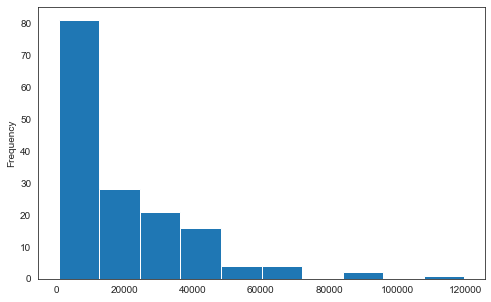

In [31]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(8, 5))
np.exp(data[data['Year']==2018]['Log GDP per capita']).plot(
    kind='hist'
)

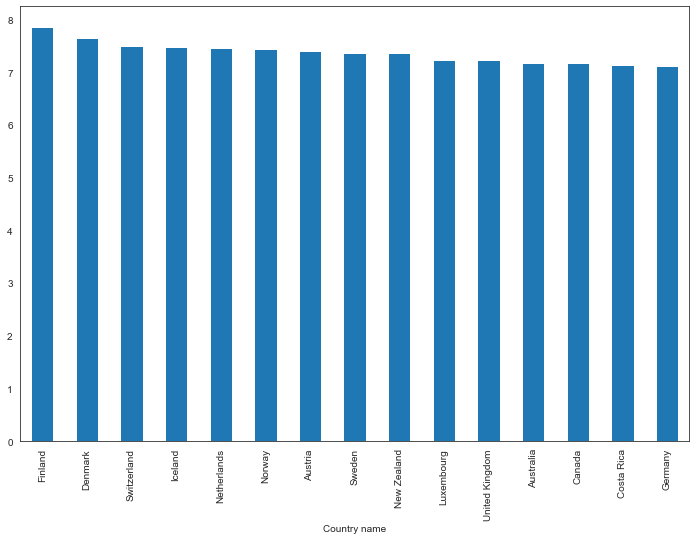

In [32]:
data[data['Year'] == 2018
].set_index('Country name')['Life Ladder'].nlargest(15).plot(
    kind='bar',
    figsize=(12,8)
)

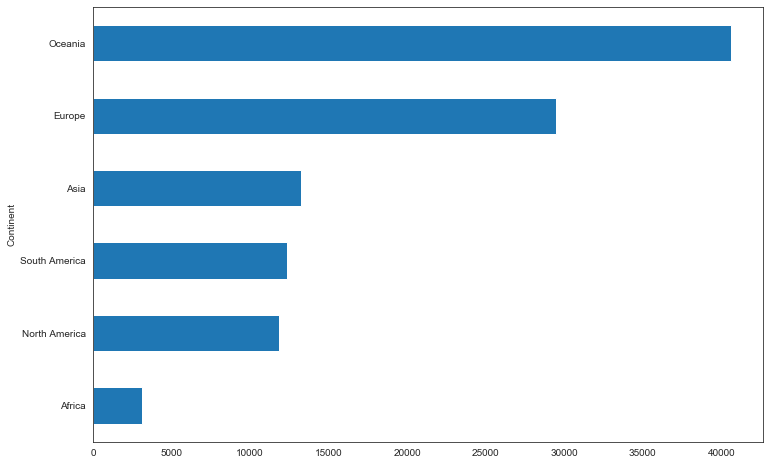

In [33]:
np.exp(data[
    data['Year'] == 2018
].groupby('Continent')['Log GDP per capita']\
       .mean()).sort_values().plot(
    kind='barh',
    figsize=(12,8)
)

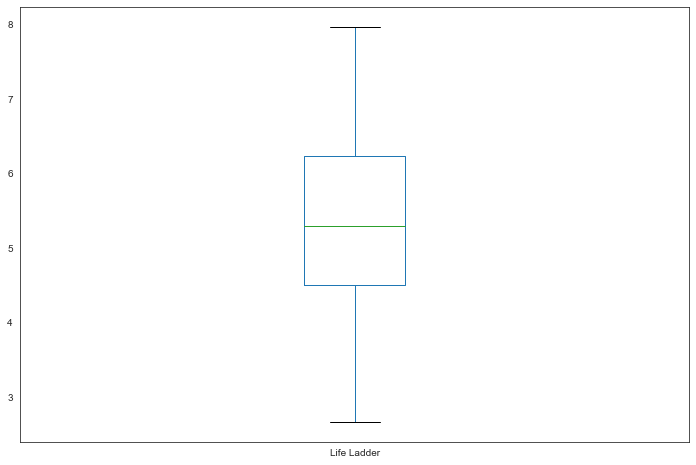

In [34]:
data['Life Ladder'].plot(
    kind='box',
    figsize=(12,8)
)

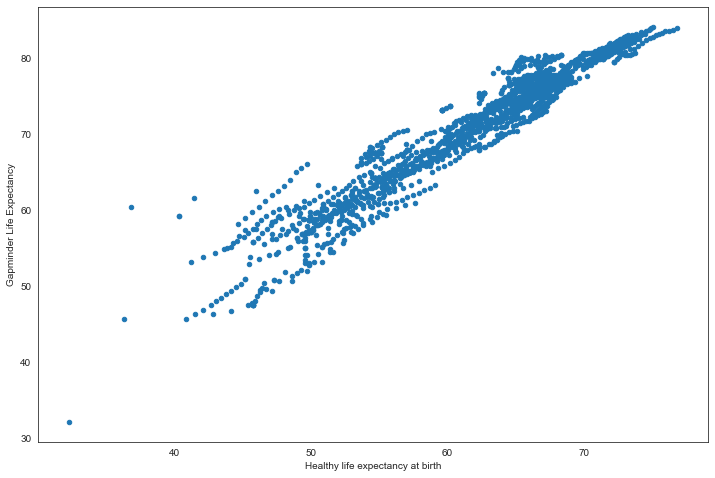

In [35]:
data[['Healthy life expectancy at birth','Gapminder Life Expectancy']].plot(
    kind='scatter',
    x='Healthy life expectancy at birth',
    y='Gapminder Life Expectancy',
    figsize=(12,8)
)

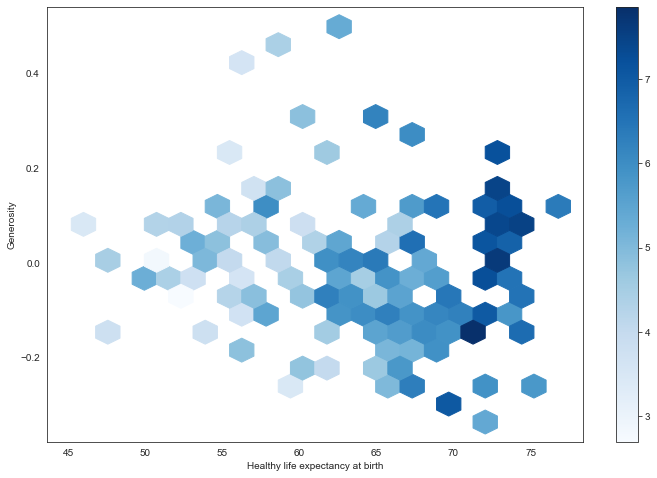

In [36]:
data[data['Year'] == 2018].plot(
    kind='hexbin',
    x='Healthy life expectancy at birth',
    y='Generosity',
    C='Life Ladder',
    gridsize=20,
    figsize=(12,8),
    cmap="Blues", # defaults to greenish
    sharex=False # required to get rid of a bug
)

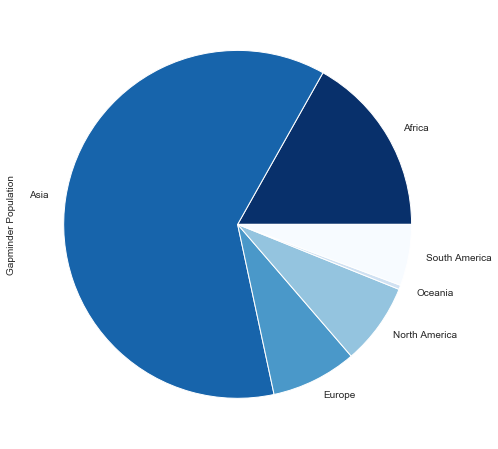

In [37]:
data[data['Year'] == 2018].groupby(
    ['Continent']
)['Gapminder Population'].sum().plot(
    kind='pie',
    figsize=(12,8),
    cmap="Blues_r", # defaults to orangish
)

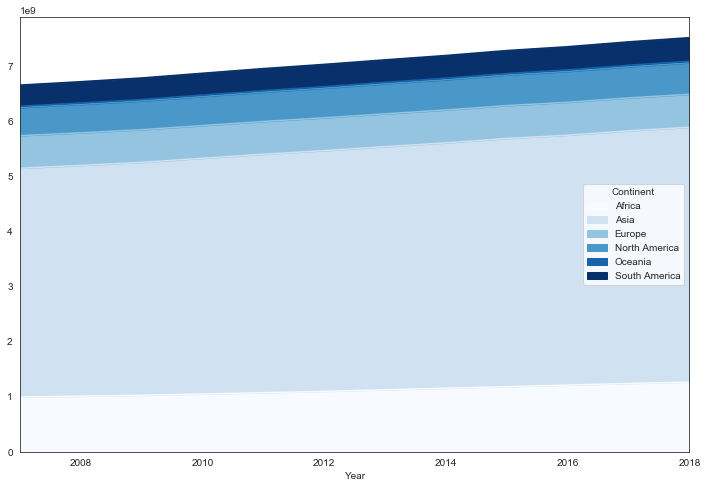

In [38]:
data.groupby(
    ['Year','Continent']
)['Gapminder Population'].sum().unstack().plot(
    kind='area',
    figsize=(12,8),
    cmap="Blues", # defaults to orangish
)

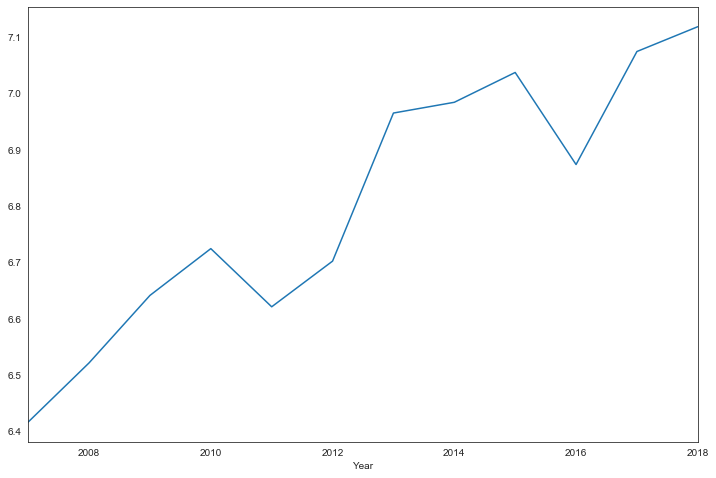

In [43]:
data[
    data['Country name'] == 'Germany'
].set_index('Year')['Life Ladder'].plot(
    kind='line',
    figsize=(12,8)
)

**Conclusion on plotting with Pandas**

Plotting with pandas is convenient. It is easily accessible, and it is fast. The plots are fairly ugly. Deviating from defaults is borderline impossible, and that is okay because we have other tools for more aesthetically appealing charts. Moving on to seaborn.